# Project: Data Analysis for No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In this project we will be doing data analysis on medical appointments having a no-show. Later predict if an appointment has a possiblity of a no-show depending on the analysis obtained from the data investigation.

The dataset contains 110k+ data of the patients and the appointment details. The details found in the dataset are,

⦁	The details of the person who has scheduled the appointment (Patient ID, Age and Gender).

⦁	The details of the appointment (AppointmentID, Scheduled date, appointment date and Neighbourhood(Location of the  appointment)).

⦁	The details of the patients medical history (Hypertension, Diabetes, Alcoholism, Handicapped).

⦁	If they have been enrolled to the Scholarship program (‘Scholarship’ indicates whether or not the patient is enrolled in     Brasilian welfare program - Bolsa Família https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

⦁	The details of reminders sent for appointments(SMS_received).

⦁	Finally the details if the patient showed up for the appointment(No-show).



The following description of the dataset is obtained from Kaggle.

1.	PatientId : Identification of a patient

2.	AppointmentID : Identification of each appointment

3.	Gender : Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

4.	ScheduledDay : The day someone called or registered the appointment, this is before appointment of course.

5.	AppointmentDay : The day of the actuall appointment, when they have to visit the doctor.

6.	Age :How old is the patient.

7.	Neighbourhood: Where the appointment takes place.

8.	Scholarship: True or False 

9.	Hipertension : True or False

10.	Diabetes : True or False

11.	Alcoholism : True or False

12.	Handcap : True or False

13.	SMS_received : 1 or more messages sent to the patient.

14.	No-show : True or False


## Research Questions:

A.	To study the factors that are crucial in determining if the patient  will show up for the appointment.

B.	To study if SMS reminders will contribute for the patient to show up for the appointment.

C.	Is there a relationship between the schedule date and the appointment date. For example if the time between the schedule date and appointment date is more, that can result to a no-show for various resaons such as their medical condition improved or they have not remembered.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('darkgrid')

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Investigate_a_Dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Check for the size and number of columns
df.shape

(110527, 14)

The dataset has 11527 rows and 14 columns.

In [5]:
#Generate descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#Check for duplicates, if there are no duplicates the output will be 0
sum(df.duplicated())

0

## Dataset Observations:

⦁	The dataset has 14 columns.

⦁	There are no duplicates and the dataset has 110527 rows.

⦁	The patient id and appointment id are not necessary and they can be dropped.

⦁	The "Age" column has a minimum of -1 and max of 115, so the data should be analysed and cleaned. The max value of 115 can be expected but should be screened for discrepency.

⦁	Scholarship, Hipertension, Diabetes, Alcoholism and SMS_received  have values 0/1.

⦁	Handcap has a max value of 4, should be analysed further to check the impact of all values in Handcap.

⦁	The Scheduled date and Appointment date should be of the datetime datatype.

⦁	The Appointment date has no time values its always "00:00:00".

⦁	The no-show should be converted to datatype bool/int.


### Data Cleaning

The following details need to be verified or changed for data cleaning,

1.	Rename column names.

2.	Check for "Age" with values <=0 and replace then with mean of "Age"

3.	Analysis of "Age" where the values are high (for max values such as 115 observed earlier).

4.	The columns with Datetime values should be of type Datetime.

5.	Scheduled date should be earlier than Appointment date.

6.	For the ease of analysis, change the column "No-show" from object to int.

In [8]:
#Rename misspelled columns
df.rename(columns = {'Hipertension':'hypertension', 'Handcap':'handicap', 'No-show':'no_show'}, inplace=True)

#convert column names to lowercase
df.columns = map(str.lower, df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.drop(columns=['patientid', 'appointmentid'], inplace=True)

In [10]:
sum(df.duplicated())

635

In [12]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [13]:
#Check values of all coulmns have valid values
df[df["age"] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
#There seems to be only one row with value -1, drop the row
df.drop([99832], inplace=True)

In [15]:
df[df["age"] == 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [16]:
#There are 3530 columns with age as == 0, we will replace this my mean age
mean_age = df['age'].mean()
df.loc[df['age'] <= 0, 'age'] = mean_age
df = df.astype({"age": int})

In [17]:
df[df["age"] <= 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [18]:
df[df["age"] == 115]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


The first three rows seem to be of the same person taken appointment at different times.

In [19]:
#Convert scheduled date and appointment dates to datetime datatypes
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
gender            109891 non-null object
scheduledday      109891 non-null datetime64[ns]
appointmentday    109891 non-null datetime64[ns]
age               109891 non-null int64
neighbourhood     109891 non-null object
scholarship       109891 non-null int64
hypertension      109891 non-null int64
diabetes          109891 non-null int64
alcoholism        109891 non-null int64
handicap          109891 non-null int64
sms_received      109891 non-null int64
no_show           109891 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


In [20]:
#data where the appointment date is prior to scheduled date
df[(df['appointmentday'] - df['scheduledday']).dt.days < -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [21]:
#drop the above rows
df.drop([27033,55226,64175,71533,72362], inplace=True)

In [22]:
df[(df['appointmentday'] - df['scheduledday']).dt.days < -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [23]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#Convert no_show values from Yes/No to 1/0
df.loc[df['no_show'] == 'Yes', 'no_show'] = '1'
df.loc[df['no_show'] == 'No', 'no_show'] = '0'

#Convert column to int datatype
df['no_show'] = df['no_show'].astype(str).astype(int)

In [25]:
df[df['no_show'] == 1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
11,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1
17,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1
20,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1
21,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,1
22,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,1
31,M,2016-04-27 12:07:14,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,1
44,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1
48,F,2016-04-26 07:19:49,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,1


In [26]:
df[df['no_show'] == 0]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0
10,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0
12,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,0


There are 20% of no-shows in the cleaned data. Let us further explore with statistics and visualizations.

<a id='eda'></a>
## Exploratory Data Analysis

### Relationship of the appointment data with no-shows.

A. To study the factors that are crucial in determining if the patient will show up for the appointment.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd72a50e518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd72a356400>]], dtype=object)

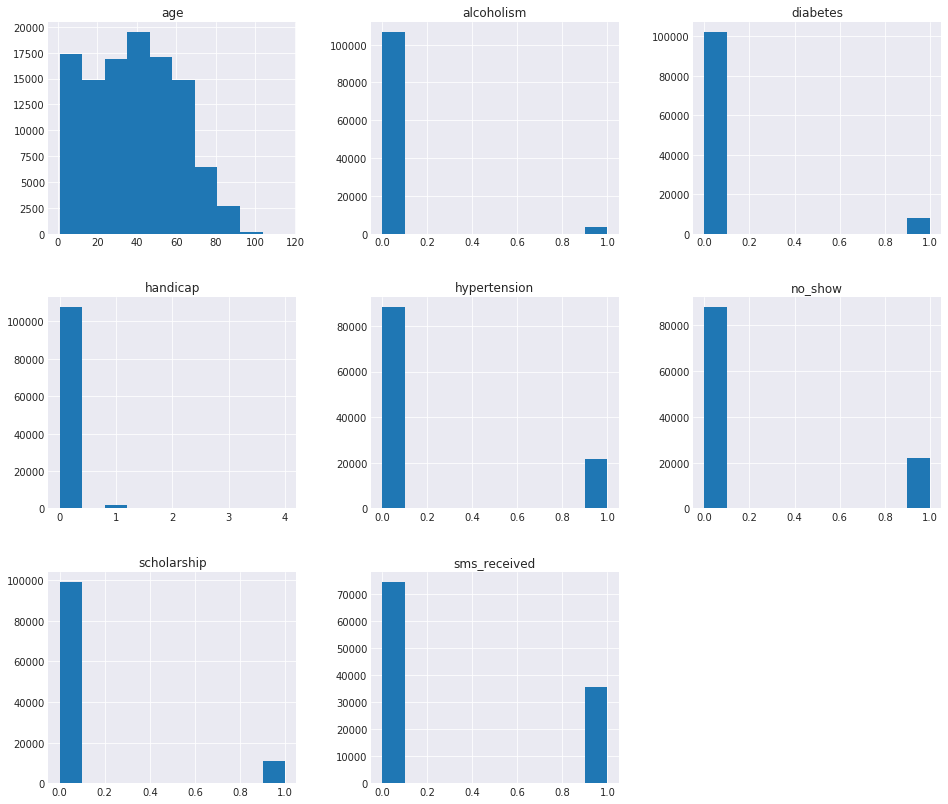

In [27]:
df.hist(figsize=(16,14))

The following are the observations from the histogram.

1. The appointments that are scheduled is mostly for children with the age 10 or adults from 22 to 58 years.
2. The majority of the patients are non-alcoholic, have no diabetes or hypertension.
3. There are only 22k no-show patients.
4. Appointment reminders were sent 70% of the time to patients.
5. There are very few who have enrolled for the scholarship programme.

In [29]:
df.no_show.value_counts()

0    87793
1    22093
Name: no_show, dtype: int64

In [30]:
no_show_yes = df.query('no_show == 1').no_show.count()
no_show_no = df.query('no_show == 0').no_show.count()

Text(0.5,1,'Number of No-shows')

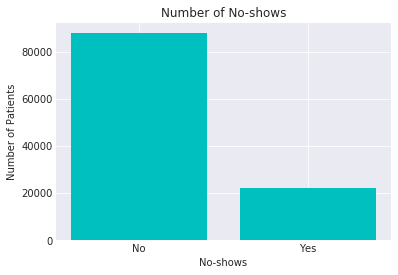

In [31]:
plt.bar(["Yes","No"],[no_show_yes, no_show_no], color='c')
plt.xlabel("No-shows")
plt.ylabel("Number of Patients")
plt.title("Number of No-shows")

### Research Question 2  

B. To study if SMS reminders will contribute for the patient to show up for the appointment.

In [32]:
sms_total = df.groupby(['sms_received']).no_show.count()
sms_total

sms_received
0    74404
1    35482
Name: no_show, dtype: int64

In [33]:
sms_no_show = df.groupby(['sms_received','no_show']).no_show.count()
sms_no_show

sms_received  no_show
0             0          62095
              1          12309
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [35]:
ind = np.arange(len(sms_total))  # the x locations for the groups
width = 0.35       # the width of the bars

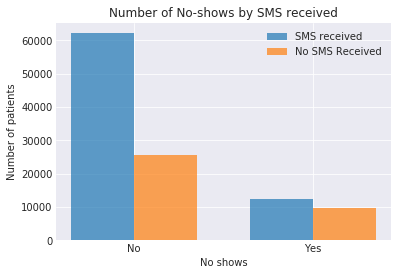

In [36]:
# plot bars
sms_bars = plt.bar(ind, sms_no_show[0], width,  alpha=.7, label='SMS received')
no_show_bars = plt.bar(ind + width, sms_no_show[1], width, alpha=.7, label='No SMS Received')

# title and labels
plt.ylabel('Number of patients')
plt.xlabel('No shows')
plt.title('Number of No-shows by SMS received')
locations = ind + width / 2  # xtick locations
labels = ['No', 'Yes']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

The above chart illustrates if there is a dependency of SMS on the no-shows. 

SMS reminders sent have helped in decreasing the number of no-shows.

SMS have been sent to 87k+ patients and 62K have turned up for the appointment.


### Research Question 3

C. Is there a relationship between the schedule date and the appointment date. For example if the time between the schedule date and appointment date is more, that can result to a no-show for various resaons such as their medical condition improved or they have not remembered.

In [37]:
#Add a new column days_diff which has the difference between the appointment day and the scheduled day.
df['days_diff'] = (df['appointmentday'] - df['scheduledday']).dt.days
df['days_diff'] = df['days_diff'].astype('timedelta64[D]')
df['days_diff'] = df['days_diff'] / np.timedelta64(1, 'D')
df

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_diff
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1.0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1.0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1.0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1.0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1.0
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,1.0
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,1.0
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,1.0
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,-1.0
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,1.0


In [38]:
#Replace the columns with -1 to 0 since they are same day appointments
df.loc[df['days_diff'] == -1, 'days_diff'] = 0

In [39]:
#Plot the chart by getting count of no_shows, for both above mean and below mean
days_diff_mean = df['days_diff'].mean()
days_diff_low = df[df['days_diff'] <= days_diff_mean]
days_diff_high = df[df['days_diff'] > days_diff_mean]

days_diff_low_nocount = days_diff_low[days_diff_low['no_show'] == 0].no_show.count()
days_diff_low_yescount = days_diff_low[days_diff_low['no_show'] == 1].no_show.count()

days_diff_high_nocount = days_diff_high[days_diff_high['no_show'] == 0].no_show.count()
days_diff_high_yescount = days_diff_high[days_diff_high['no_show'] == 1].no_show.count()

days_diff_low_nocount,days_diff_low_yescount,days_diff_high_nocount,days_diff_high_yescount

(64717, 11024, 23076, 11069)

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

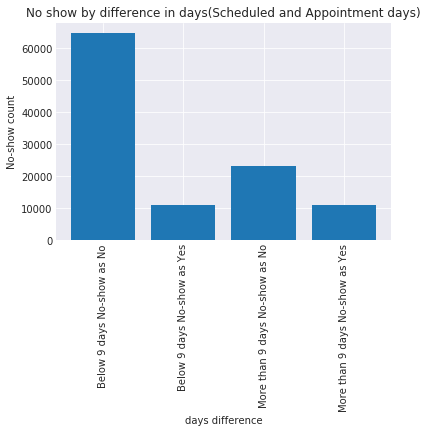

In [40]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = [days_diff_low_nocount,days_diff_low_yescount,days_diff_high_nocount,days_diff_high_yescount]
labels = ['Below 9 days No-show as No', 'Below 9 days No-show as Yes', 'More than 9 days No-show as No', 'More than 9 days No-show as Yes']
plt.bar(locations, heights, tick_label=labels)
plt.title('No show by difference in days(Scheduled and Appointment days)')
plt.xlabel('days difference')
plt.ylabel('No-show count');
plt.xticks(rotation='vertical')

The above chart illustrates that, if the patient has scheduled the appointment within 9 days, the chances of no-show is less.

Similarly if the duration of the scheduled day and appointment days is more than 9 days he is likely to miss the appointment.

<a id='conclusions'></a>
## Conclusions

The appointments had only 22k no shows for a total of 110k appointments.

SMS sent to patients have resulted in lesser number of n-shows.

The appointment scheduled within a week or two weeks have a low no-show compared to appointment scheduled prior to 9 days.

The data of patients who are alcoholic or patients with diabetes or hypertension are very less compared to the ones who are not alcoholic, diabetic or with hypertension. Further analysis could be performed if the share of data was reasonable.

The no-show trend can also be observed by the time appointment but the appointment day had no time attached to it. Also the values of Handicap ranged for 0 to 4 but no information was provided.


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0